In [1]:
from matplotlib import rc
import pandas as pd
import uvarprob as uvpr
from uniplot import plot_proc
from processor_new import Estimator

rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
# for Palatino and other serif fonts use:
rc('font', **{'family': 'serif', 'serif': ['Palatino']})
rc('text', usetex=True)
points_db = {}


In [2]:
def read_problems(fname):
    data = pd.read_csv(fname, index_col='name', comment='#')
    return data


test_file = "./test/test_casado.csv"
df = read_problems(test_file)
df

,objective,a,b,min_f,min_x
name,,,,,
1,-0.5*x^2*(log(x))+5,0.2,7.0,0,0
2,-exp(-x)*sin(2*pi*x)+1,0.2,7.0,0,0
3,-(sqrt(x))*sin(x)+1,0.2,7.0,0,0
4,x*sin(x)+sin(10.0*x/3.0)+log(x)-0.84*x+1.3,0.2,7.0,0,0
5,x+sin(5.0*x),0.2,7.0,0,0
6,-x*sin(x)+5,0.2,7.0,0,0
7,sin(x)*cos(x)-1.5*(sin(x))^2.0+1.2,0.2,7.0,0,0
8,2*cos(x)+cos(2*x)+5,0.2,7.0,0,0
9,2.0*sin(x)*exp(-x),0.2,7.0,0,0


-0.5*x^2*(log(x))+5


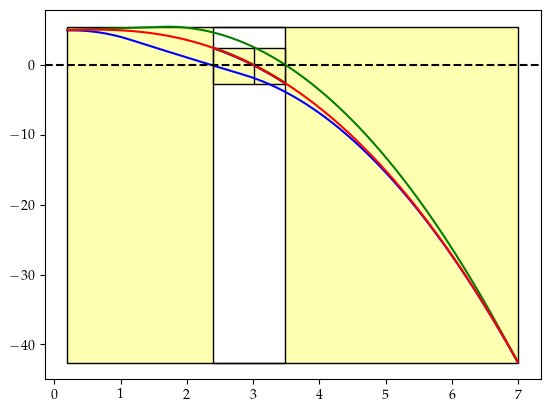

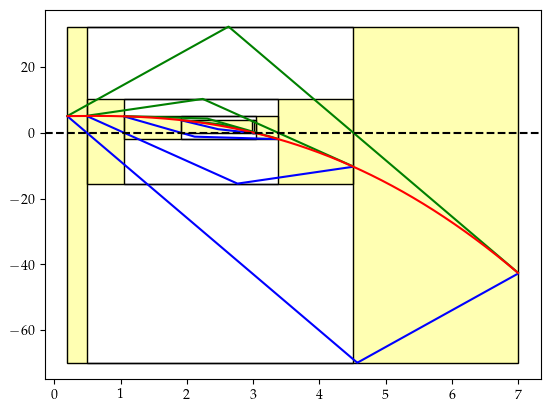

-exp(-x)*sin(2*pi*x)+1


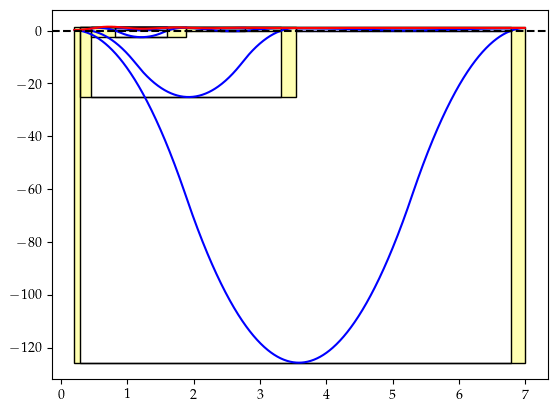

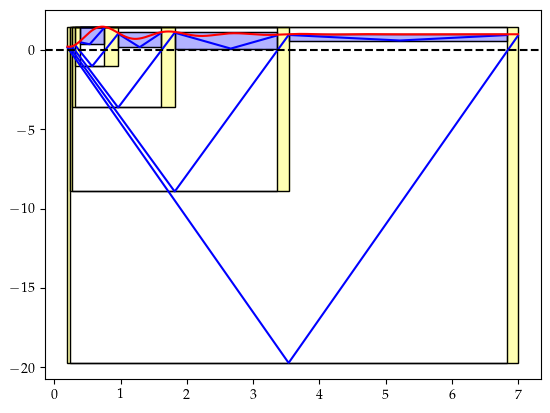

 -(sqrt(x))*sin(x)+1


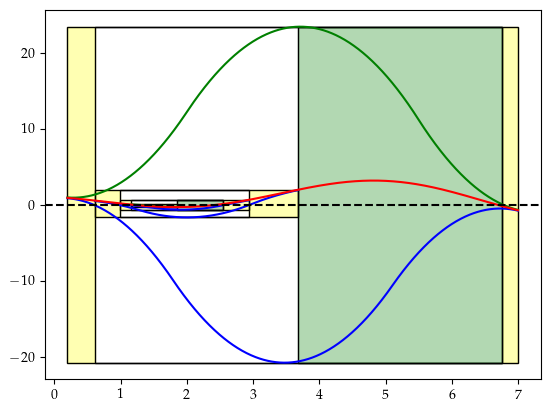

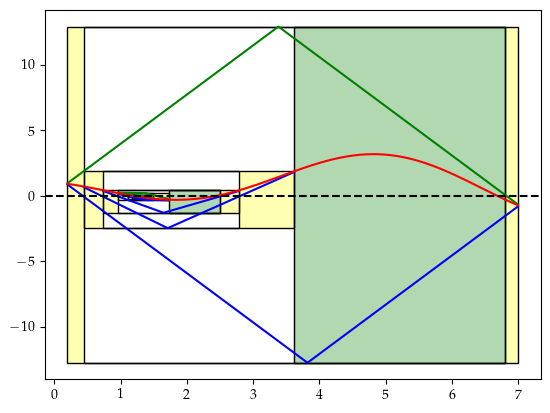

 x*sin(x)+sin(10.0*x/3.0)+log(x)-0.84*x+1.3


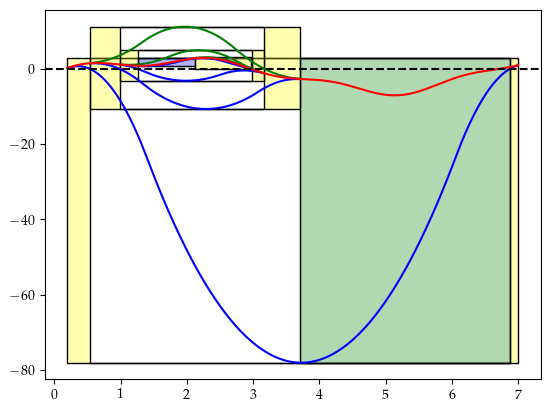

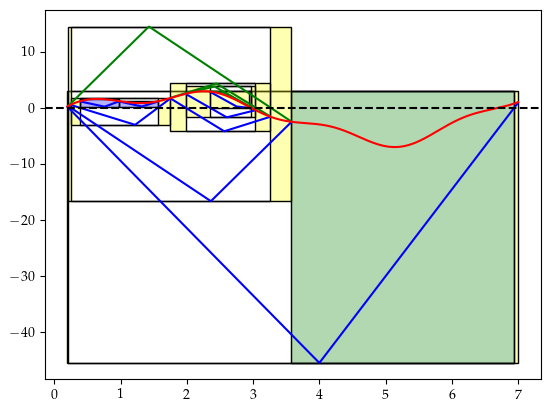

 x+sin(5.0*x)


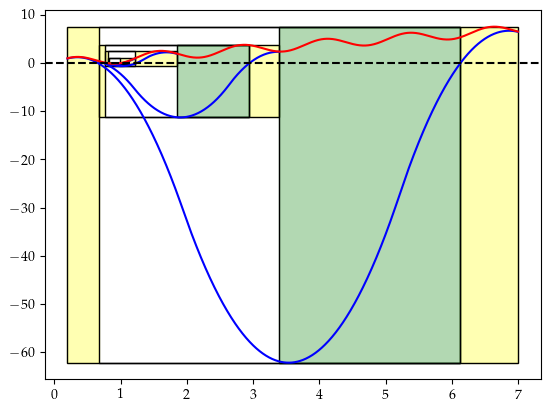

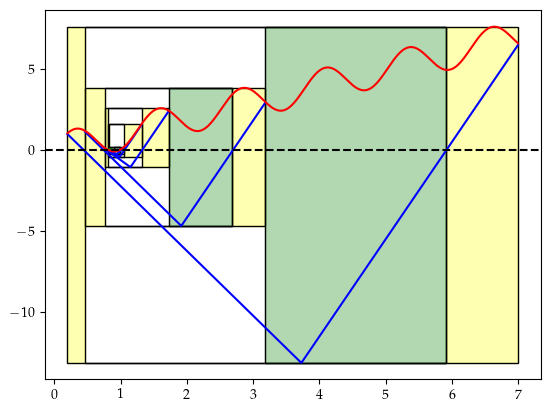

 -x*sin(x)+5


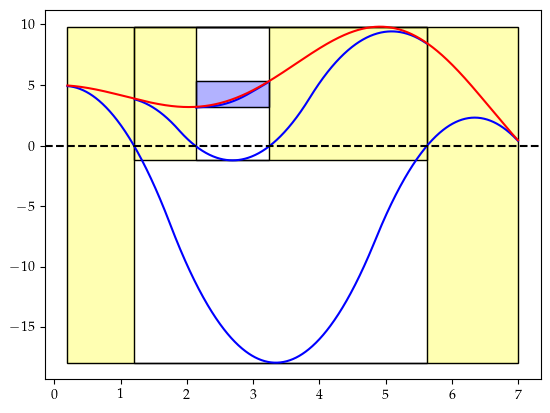

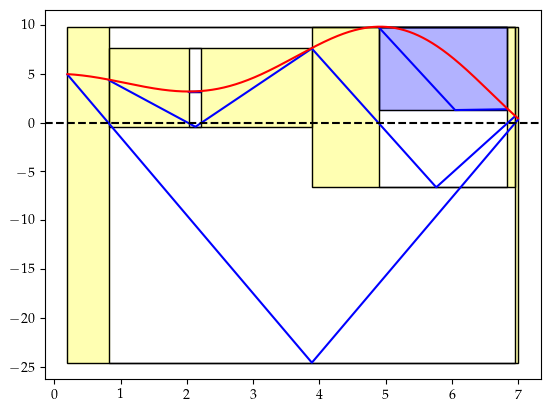

 sin(x)*cos(x)-1.5*(sin(x))^2.0+1.2


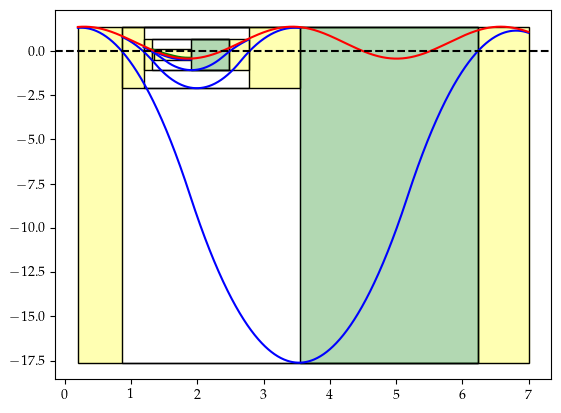

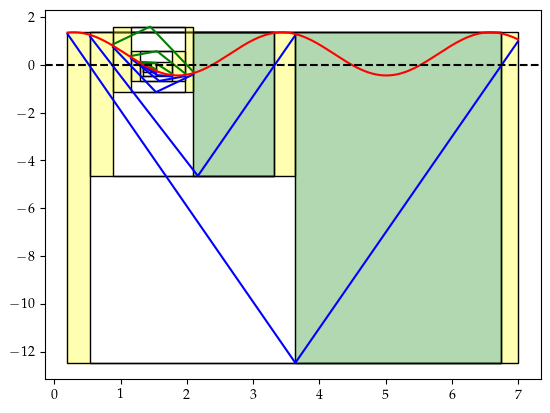

 2*cos(x)+cos(2*x)+5


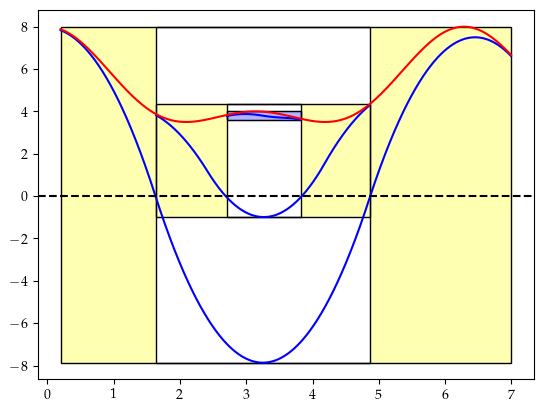

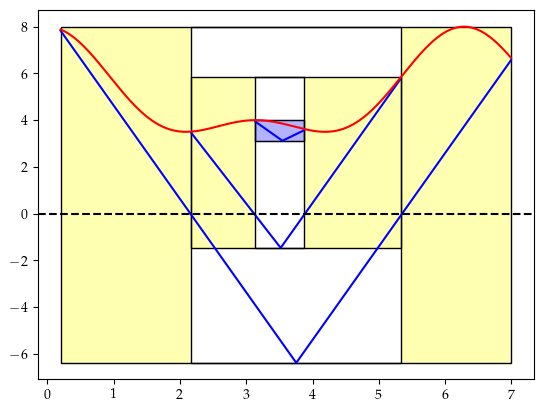

 2.0*sin(x)*exp(-x)


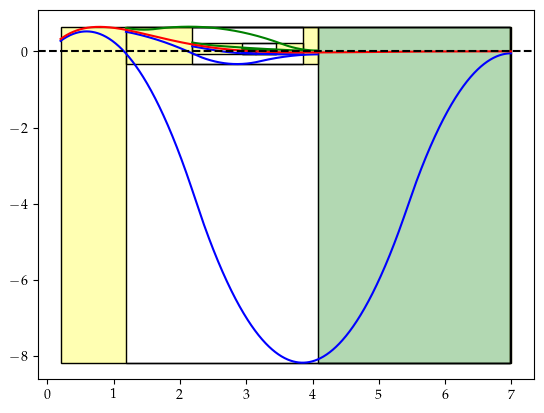

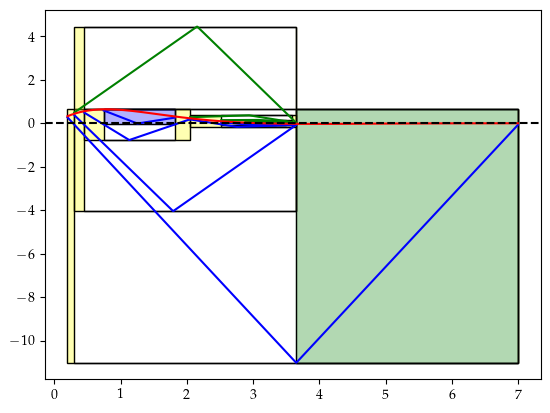

 (3*x-1.4)*sin(18.0*x)+1.7


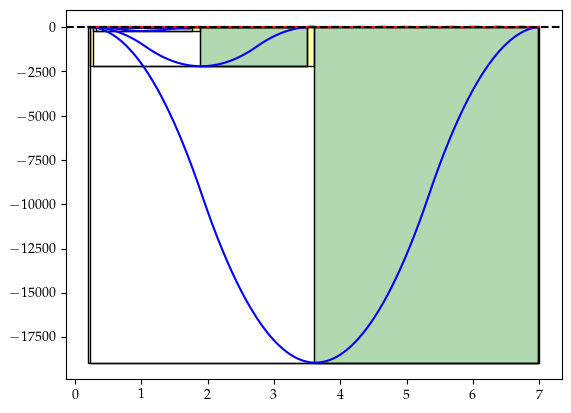

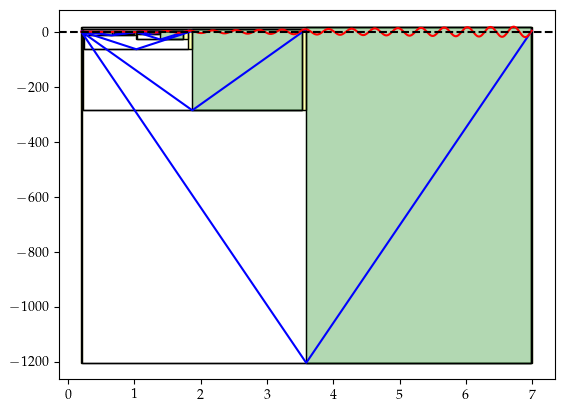

 (x+1)^3/x^2-7.1


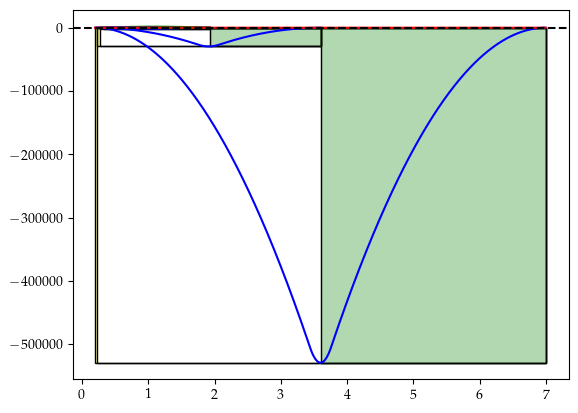

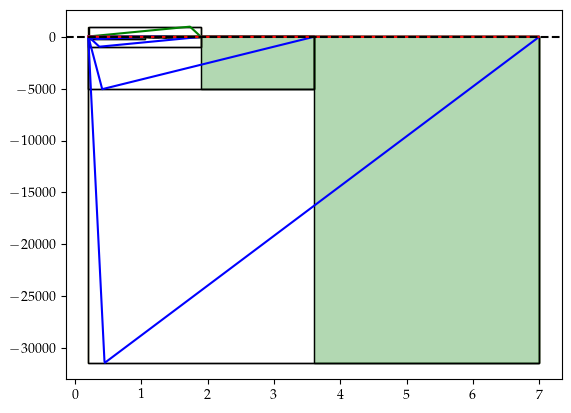

 exp(sin(3.0*x))


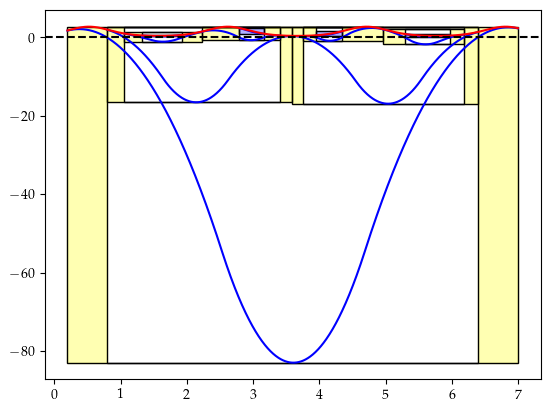

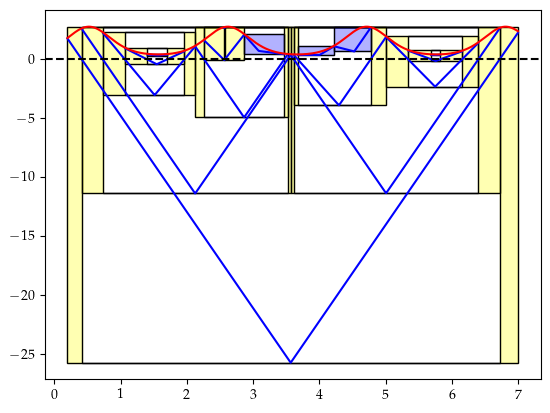

 12+cos(2.0*x+1)+2*cos(3.0*x+2)+3*cos(4.0*x+3)+4*cos(5.0*x+4)+5*cos(6.0*x+5)


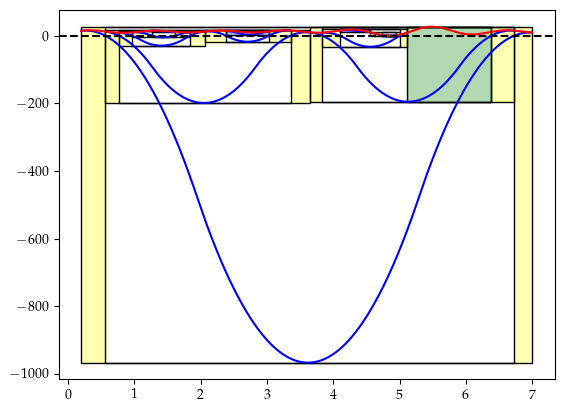

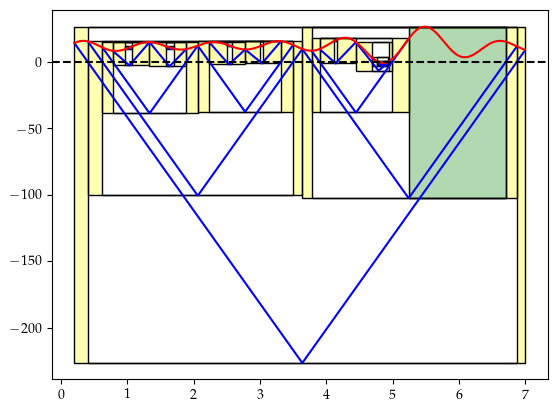

 2*(x-3)^2-exp(x/2)+5


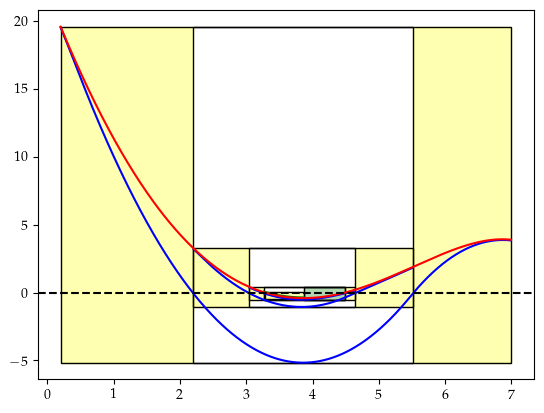

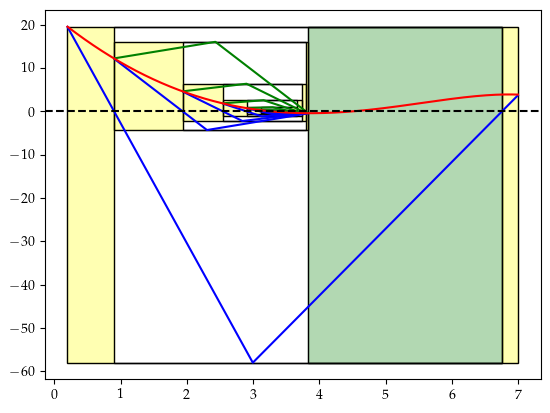

 -exp(sin(x))+4


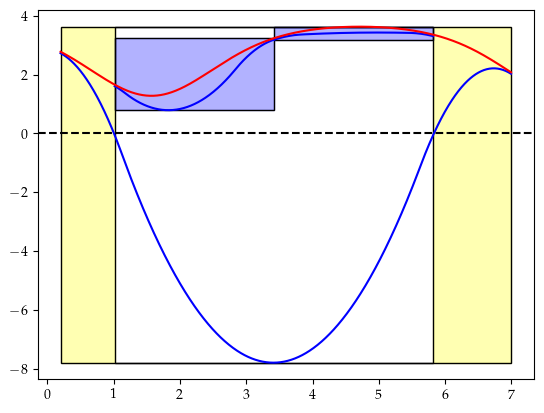

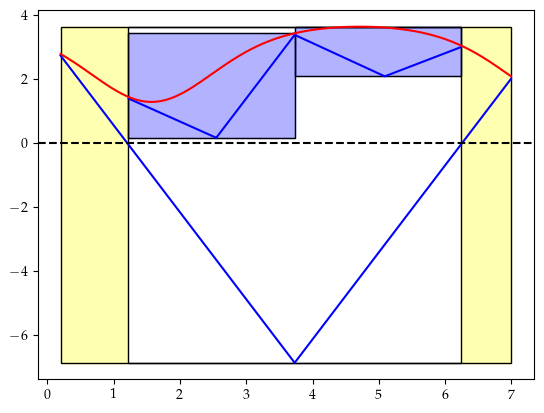

 sqrt(x)*(sin(x))^2-(1e-6)


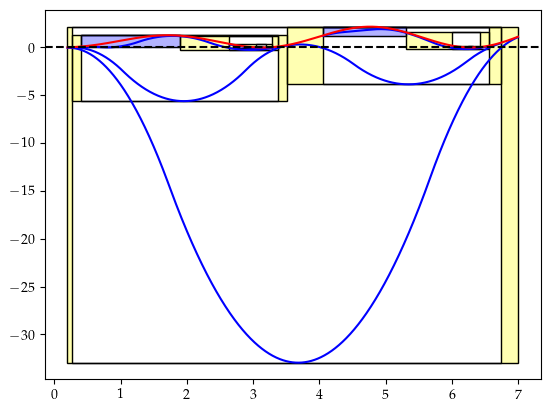

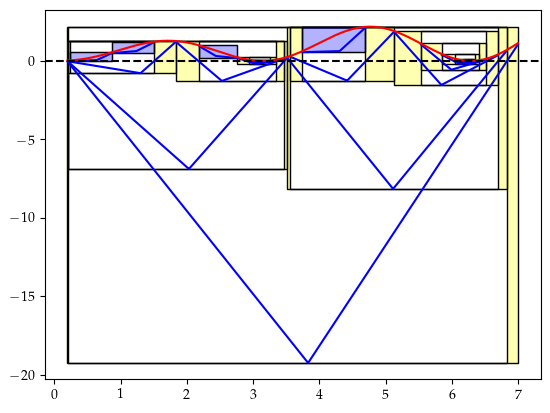

 cos(x)-sin(5.0*x)+1


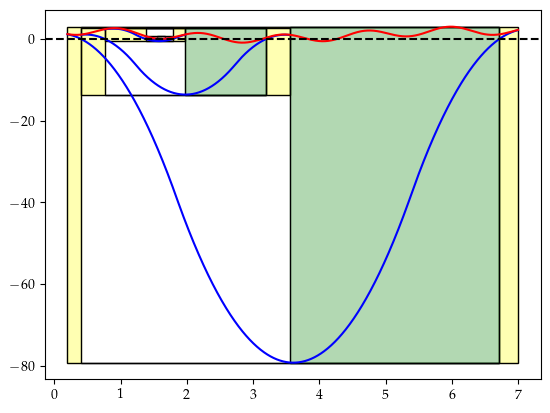

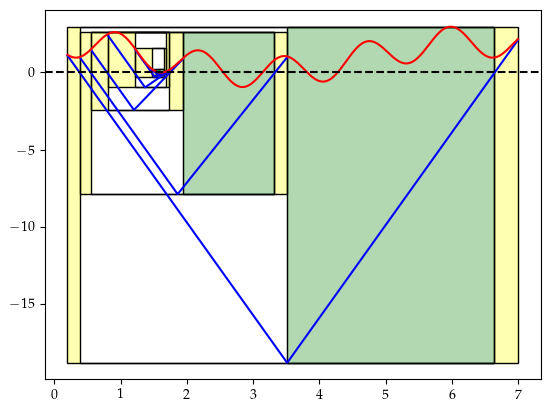

 -x-sin(3.0*x)+1.6


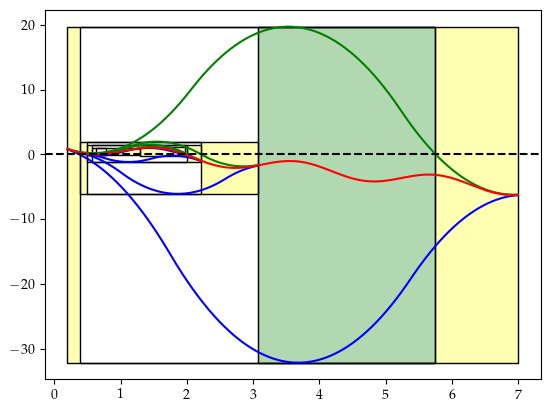

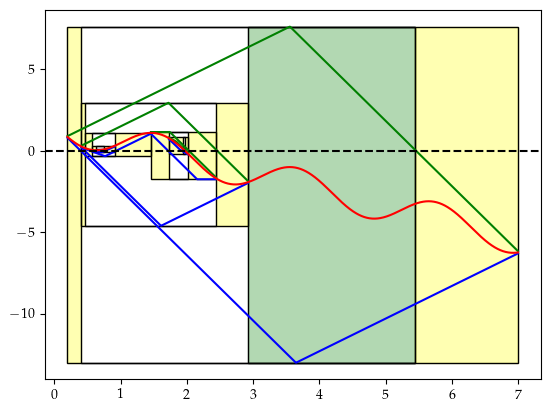

 cos(x)+2.0*cos(2.0*x)*exp(-x)


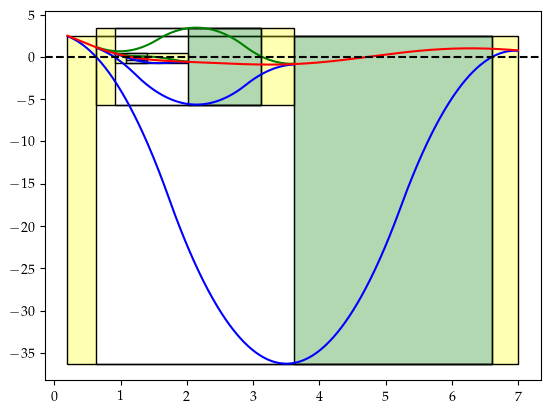

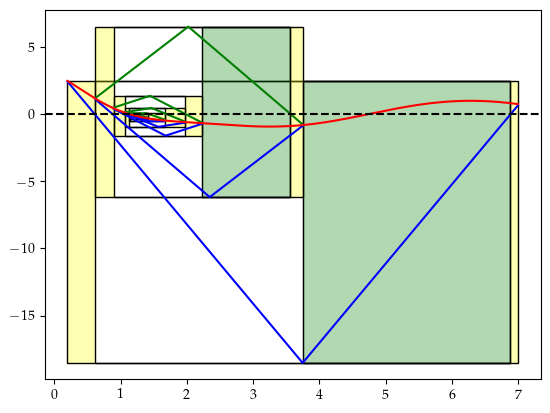

 -(sin(2*x+1)+2*sin(3*x+2)+3*sin(4*x+3)+4*sin(5*x+4)+5*sin(6*x+5))+3


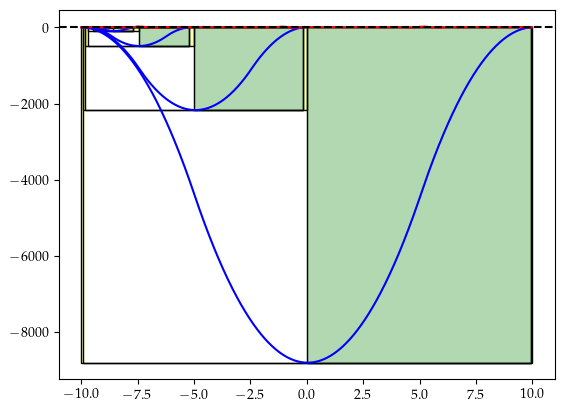

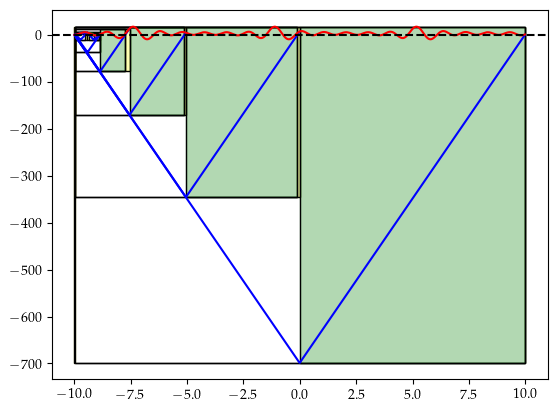

 log(3.0*x)*log(2*x)-1


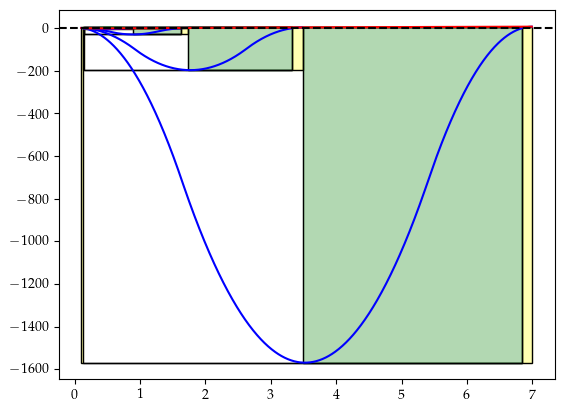

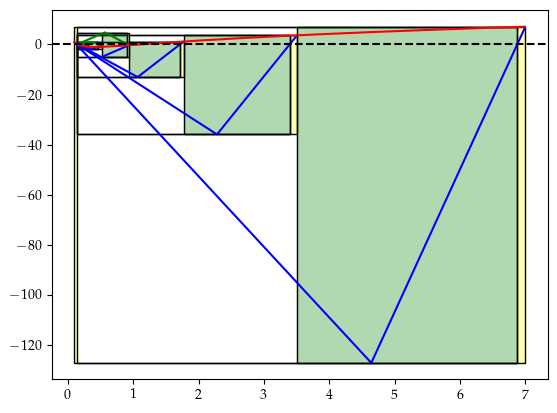

 -cos(2.0*x)-cos(3*x)-cos(4*x)-cos(5*x)-cos(6*x)


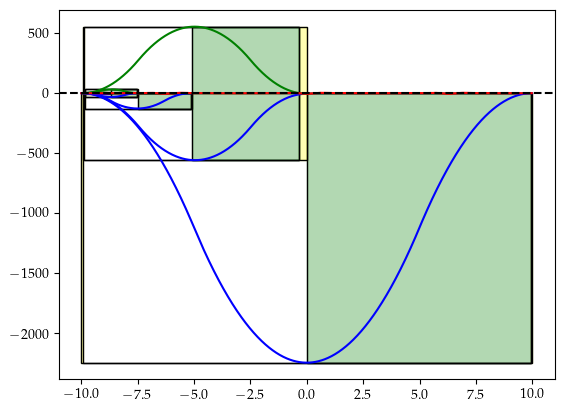

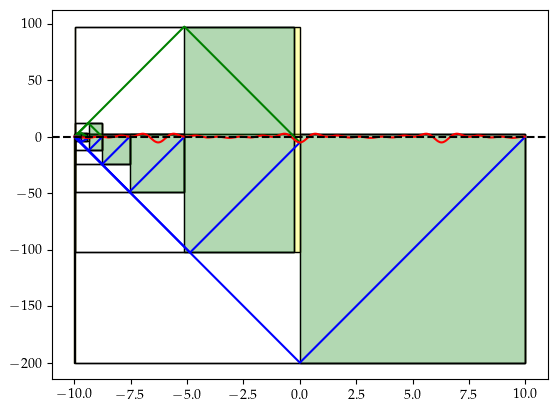

 -exp(-x)*sin(2*pi*x)+0.5


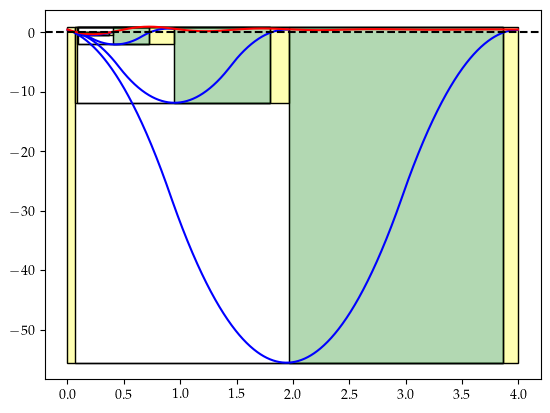

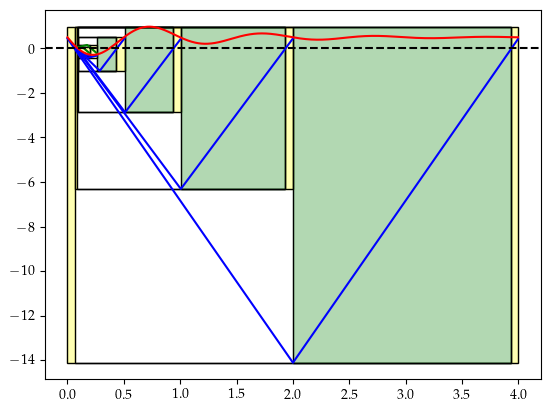

 (x^2-5*x+6)/(x^2+1)-0.5


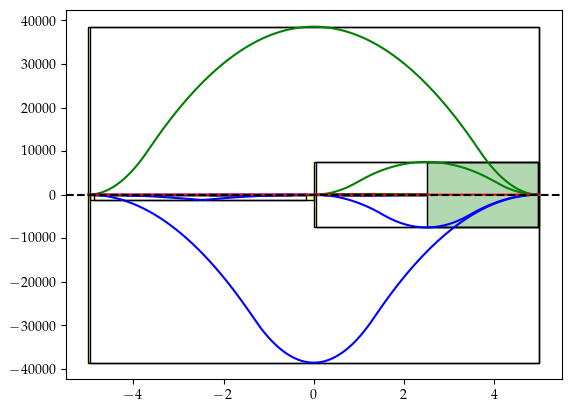

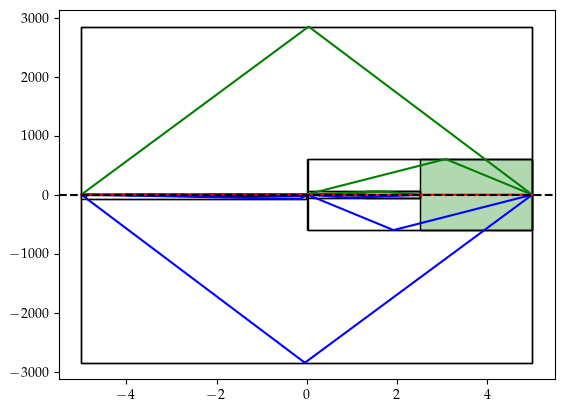

 -exp(sin(3*x))+1


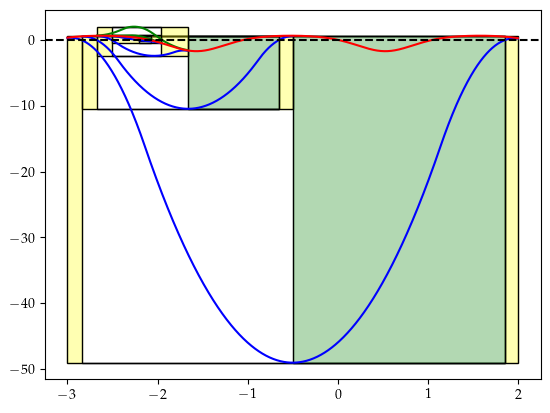

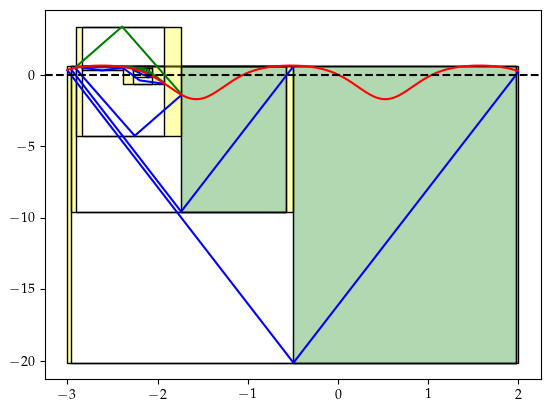

 -x+sin(3*x)+1


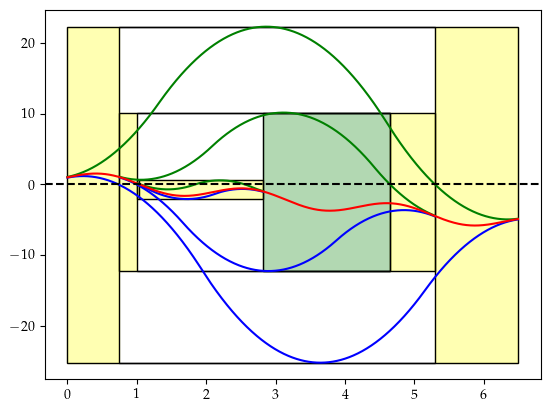

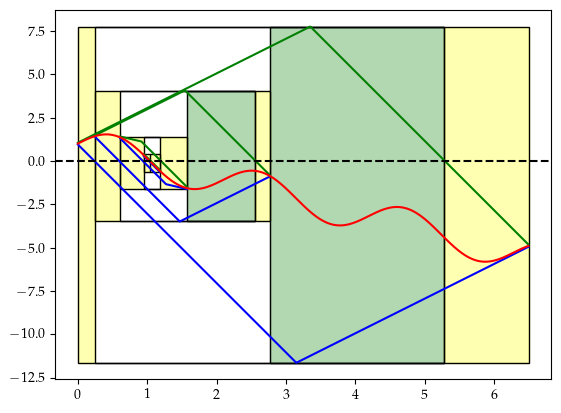

 (x+sin(x))*exp(-x^2)+0.8


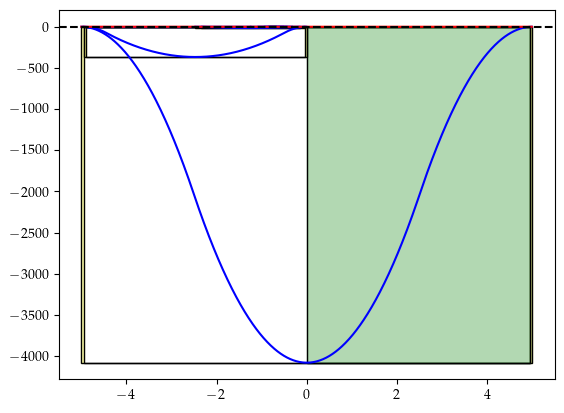

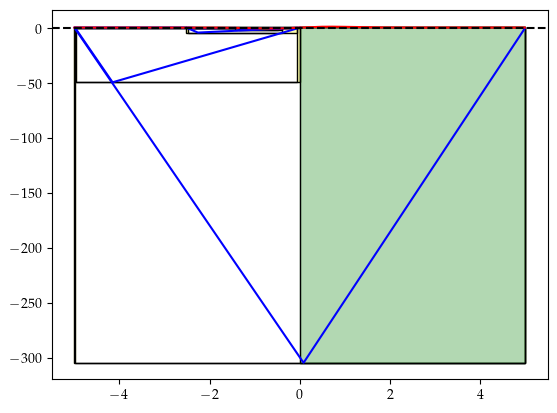

In [4]:
def log_point(x, points_list):
    points_list.append(x)


for i, test in enumerate(df.itertuples()):
    points_db[test.Index] = {'psl_lipint_points_list': [], 'psl_lip_points_list': [], 'psqe_lipint_points_list': []}
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
                              lambda x: log_point(x, points_db[test.Index]['psqe_lipint_points_list']), True)
    print(test.objective)
    plot_proc(estimator=Estimator.PSQE, sym=False, problem=prob, num_iterations=1000000000, reduction=True, eps=0.01,
              global_lip=False)
    """
    plot the process of branching and reduction
    yellow rectangles: eliminated by reduction
    blue rectangles: eliminated by under bound
    green rectangles: eliminated by record point
    :param estimator: type of estimator(PSL or PSQE)
    :param sym: symmetry of Lipschitz interval
    :param problem: uni-variate problem to solve
    :param num_iterations: maximal number of iterations to solve the problem
    :param reduction: reduction or not
    :param eps: tolerance
    :param global_lip: use the global Lipschitz approach or not
    """
    plot_proc(estimator=Estimator.PSL, sym=False, problem=prob, num_iterations=1000000000, reduction=True, eps=0.01,
              global_lip=False)